# Data Science, AI & ML Job Salaries in 2025

## Life Cycle of Machine Learning Project

- Understanding the Problem
- Data Collection
- Data Cleaning and Processing
- Exploratory Data Analysis
- Feature Engineering and Selection
- Model Selection
- Model Training
- Model Evaluation and Tunning
- Model Deployment
- Model Monitoring and Maintenance

### About

blah blah blah ...

### 1 ) Understanding the Problem
 
 blah blah blah ...

### 2 ) Data Collection

This dataset was collected from the Kaggle: https://www.kaggle.com/datasets/moro23/easyvisa-dataset

* The Dataset is part of Office of Foreign Labor Certification (OFLC)
* The data consists of 25480 Rows and 12 Columns

#### Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn, and Warings Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # For interactive plots
import math

import warnings # Suppress warnings
warnings.filterwarnings('ignore')

# This line is used in Jupyter notebooks to display plots inline
%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r"Visadataset.csv") # Import the CSV Data as Pandas DataFrame

#### Show top 5 records

In [3]:
df.head() # Show top 5 records

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Shape of the Dataset

In [4]:
df.shape

(25480, 12)

#### Summary of the Dataset

In [10]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Check Data types in Dataset

In [11]:
# check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### 3 ) Exploring Data

In [12]:
# separating both the numerical and categorical features
# define numerical and categorical features
numeric_features = [features for features in df.columns if df[features].dtype != 'O'] # this line checks for non-object data types, which are typically numerical
categorical_features = [features for features in df.columns if df[features].dtype == 'O'] # this line checks for object data types, which are typically categorical

# this is an example of automatic coding, automating the process

# print the columns
print('We have {} numerical features: {}' .format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [ ]:
# Proportion of count data on categorical columns
for cols in categorical_features:
    print (df[cols].value_counts(normalize=True) * 100)
    print('----------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
----------------------
region_of_employment
Northeast    28.237834
South        27.

### Univariate Analysis

To understand the distribution of values for a single variable.

Other Types:

- Bivariate : The analysis of two variables
- Multivariate : The analysis of two or more variables

#### * Numerical Features

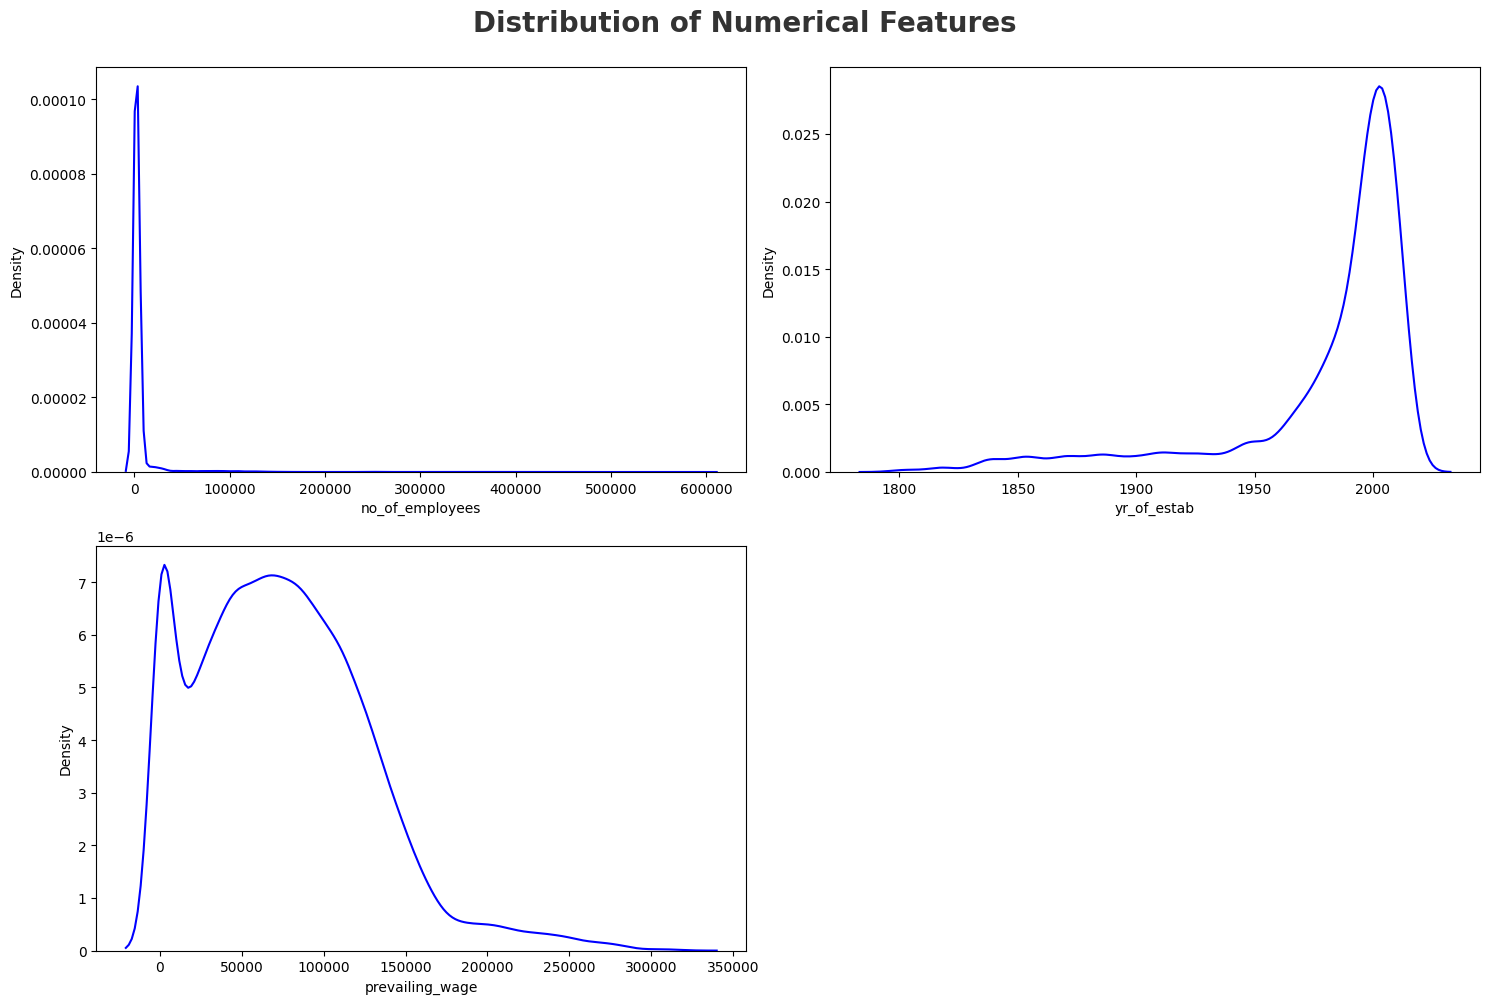

In [15]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

There is only one problem with the plots above, they seemed to be skewed.

1. no_of_employees column looks more skewed but it may be because of outlies.
2. yr_of_estab is a discrete feature.
3. prevailing_wage is a right-skewed distribution.

#### * Categorical Features

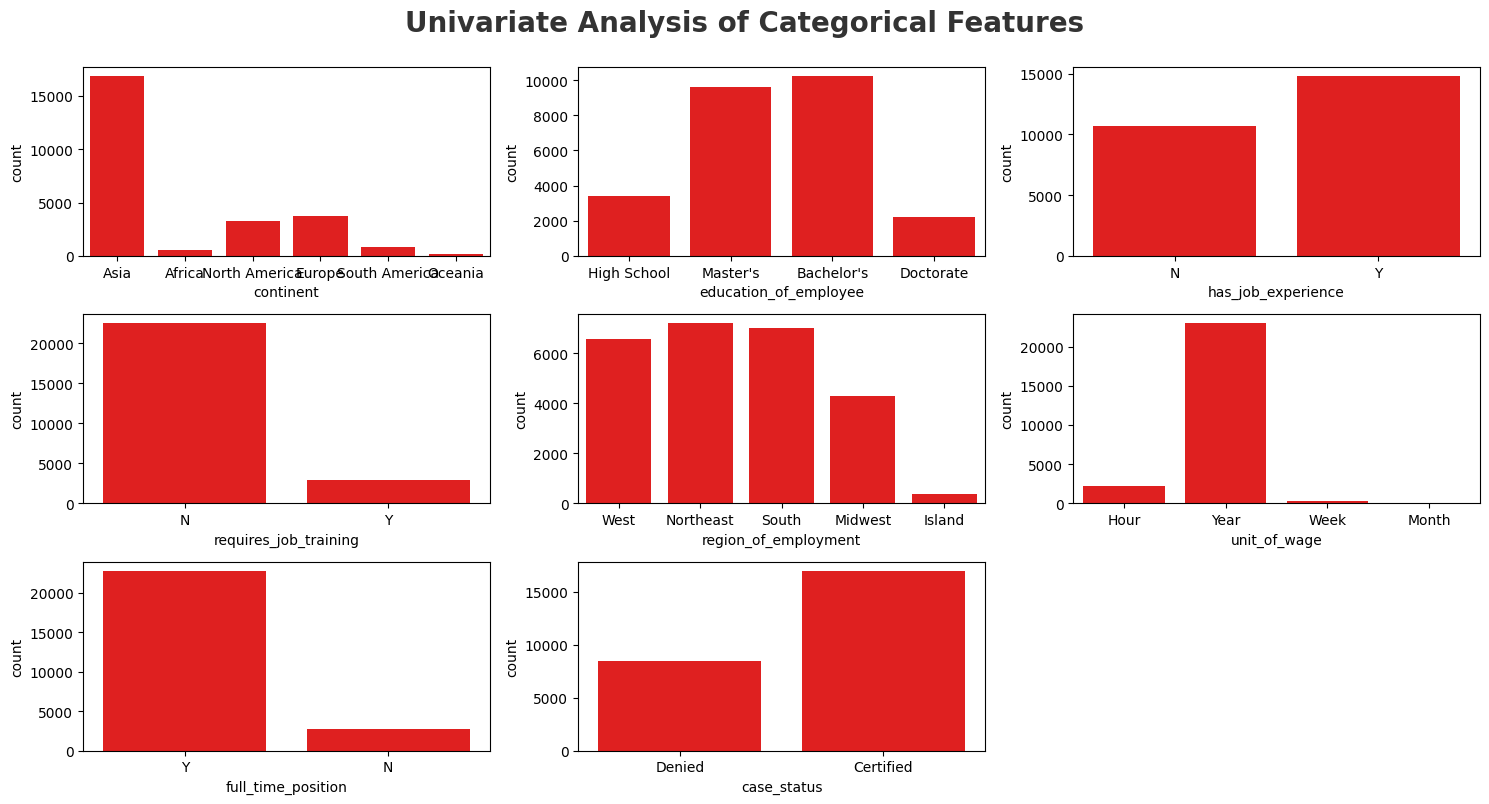

In [ ]:
categorical_features.remove('case_id')  # Remove 'case_id' as it is not a categorical feature for plotting

plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], color='red')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

#### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable

In [18]:
discrete_features = [feature for feature in numeric_features if len (df[feature].unique()) <= 25]
continuous_features = [feature for feature in numeric_features if len (df[feature].unique()) > 25]

# Print the discrete and continuous features
print('We have {} discrete_features: {}' .format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features: {}'.format(len(continuous_features), continuous_features))

# Or
# print(f'We have {len(discrete_features)} discrete_features: {discrete_features}')
# print(f'\nWe have {len(continuous_features)} continuous_features: {continuous_features}')

We have 0 discrete_features: []

We have 3 continuous_features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


#### Check Multicollinearity in Numerical Features

In [19]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Check Multicollinearity in Categorical Features

* A chi-squared test (also chi-square or χ² test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson’s chi-squared test.

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of categorical columns with the target column, i.e. case_status.

    -   Null Hypothesis (H₀): 
The feature is independent of the target column (no correlation).

    -   Alternative Hypothesis (H₁): 
The feature and target column are not independent (correlated).

In [ ]:
# this block of code is used to check the correlation between the numerical features


from scipy.stats import chi2_contingency
chi2_Test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_Test.append('Reject Null Hypothesis')
    else:
        chi2_Test.append('Fail to Reject Null Hypothesis')

results = pd.DataFrame({'Column': categorical_features, 'Hypothesis Result': chi2_Test})
results.columns = ['Column', 'Hypothesis Result']
results

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


In [22]:
from itertools import combinations
from scipy.stats import chi2_contingency

pairs      = []
chi2_Test  = []

# Loop through every unique pair of categorical features
for col1, col2 in combinations(categorical_features, 2):
    # build contingency table
    ct = pd.crosstab(df[col1], df[col2])
    
    # run chi²
    p_value = chi2_contingency(ct)[1]
    
    # record result
    pairs.append(f"{col1} vs {col2}")
    chi2_Test.append(
        "Reject H₀ (dependent)" 
        if p_value < 0.05 
        else "Fail to reject H₀ (independent)"
    )

# assemble into a DataFrame
results = pd.DataFrame({
    "Feature Pair":   pairs,
    "Hypothesis Test": chi2_Test
})

results

,Feature Pair,Hypothesis Test
0,continent vs education_of_employee,Reject H₀ (dependent)
1,continent vs has_job_experience,Fail to reject H₀ (independent)
2,continent vs requires_job_training,Reject H₀ (dependent)
3,continent vs region_of_employment,Reject H₀ (dependent)
4,continent vs unit_of_wage,Reject H₀ (dependent)
5,continent vs full_time_position,Reject H₀ (dependent)
6,continent vs case_status,Reject H₀ (dependent)
7,education_of_employee vs has_job_experience,Fail to reject H₀ (independent)
8,education_of_employee vs requires_job_training,Reject H₀ (dependent)
9,education_of_employee vs region_of_employment,Reject H₀ (dependent)


#### Checking Null Values

In [23]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [24]:
continuous_features = [feature for feature in numeric_features if len (df[feature].unique()) >= 10]
print('Number of continuous_features: ', continuous_features)

Number of continuous_features:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


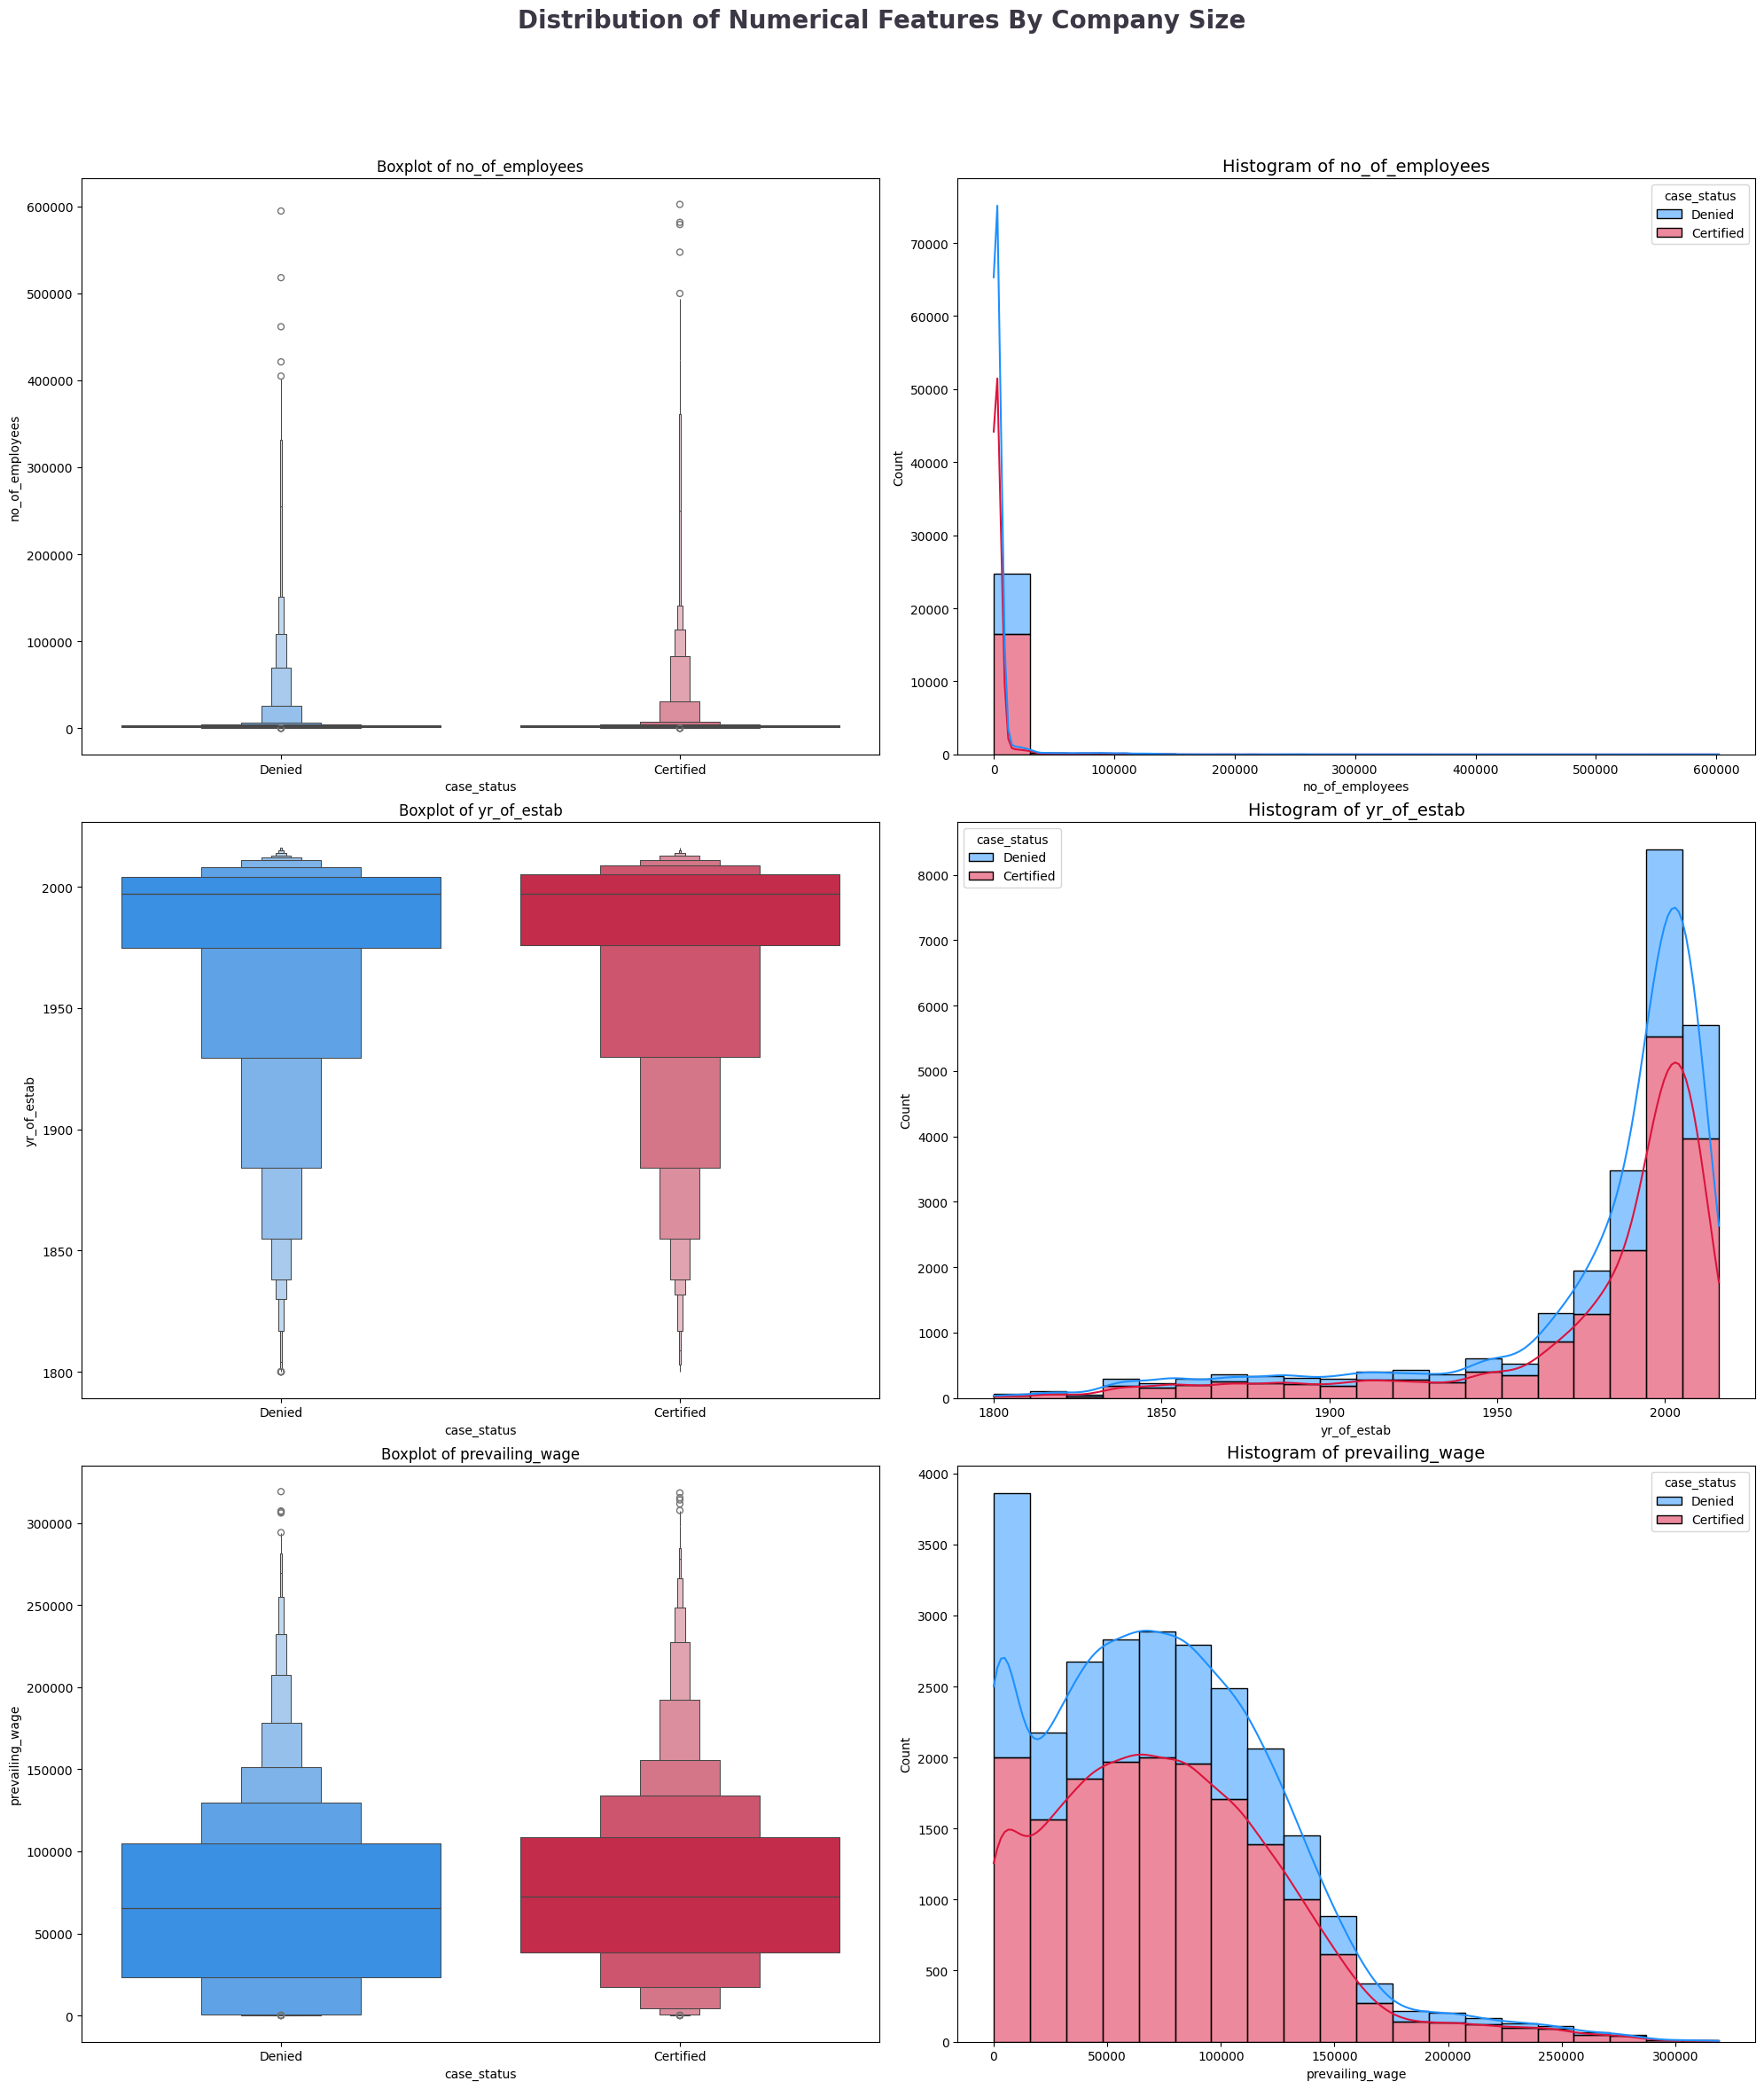

In [25]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(20,24))
fig.suptitle('Distribution of Numerical Features By Company Size', color='#3C3744',
    fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continuous_features):
    sns.boxenplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)

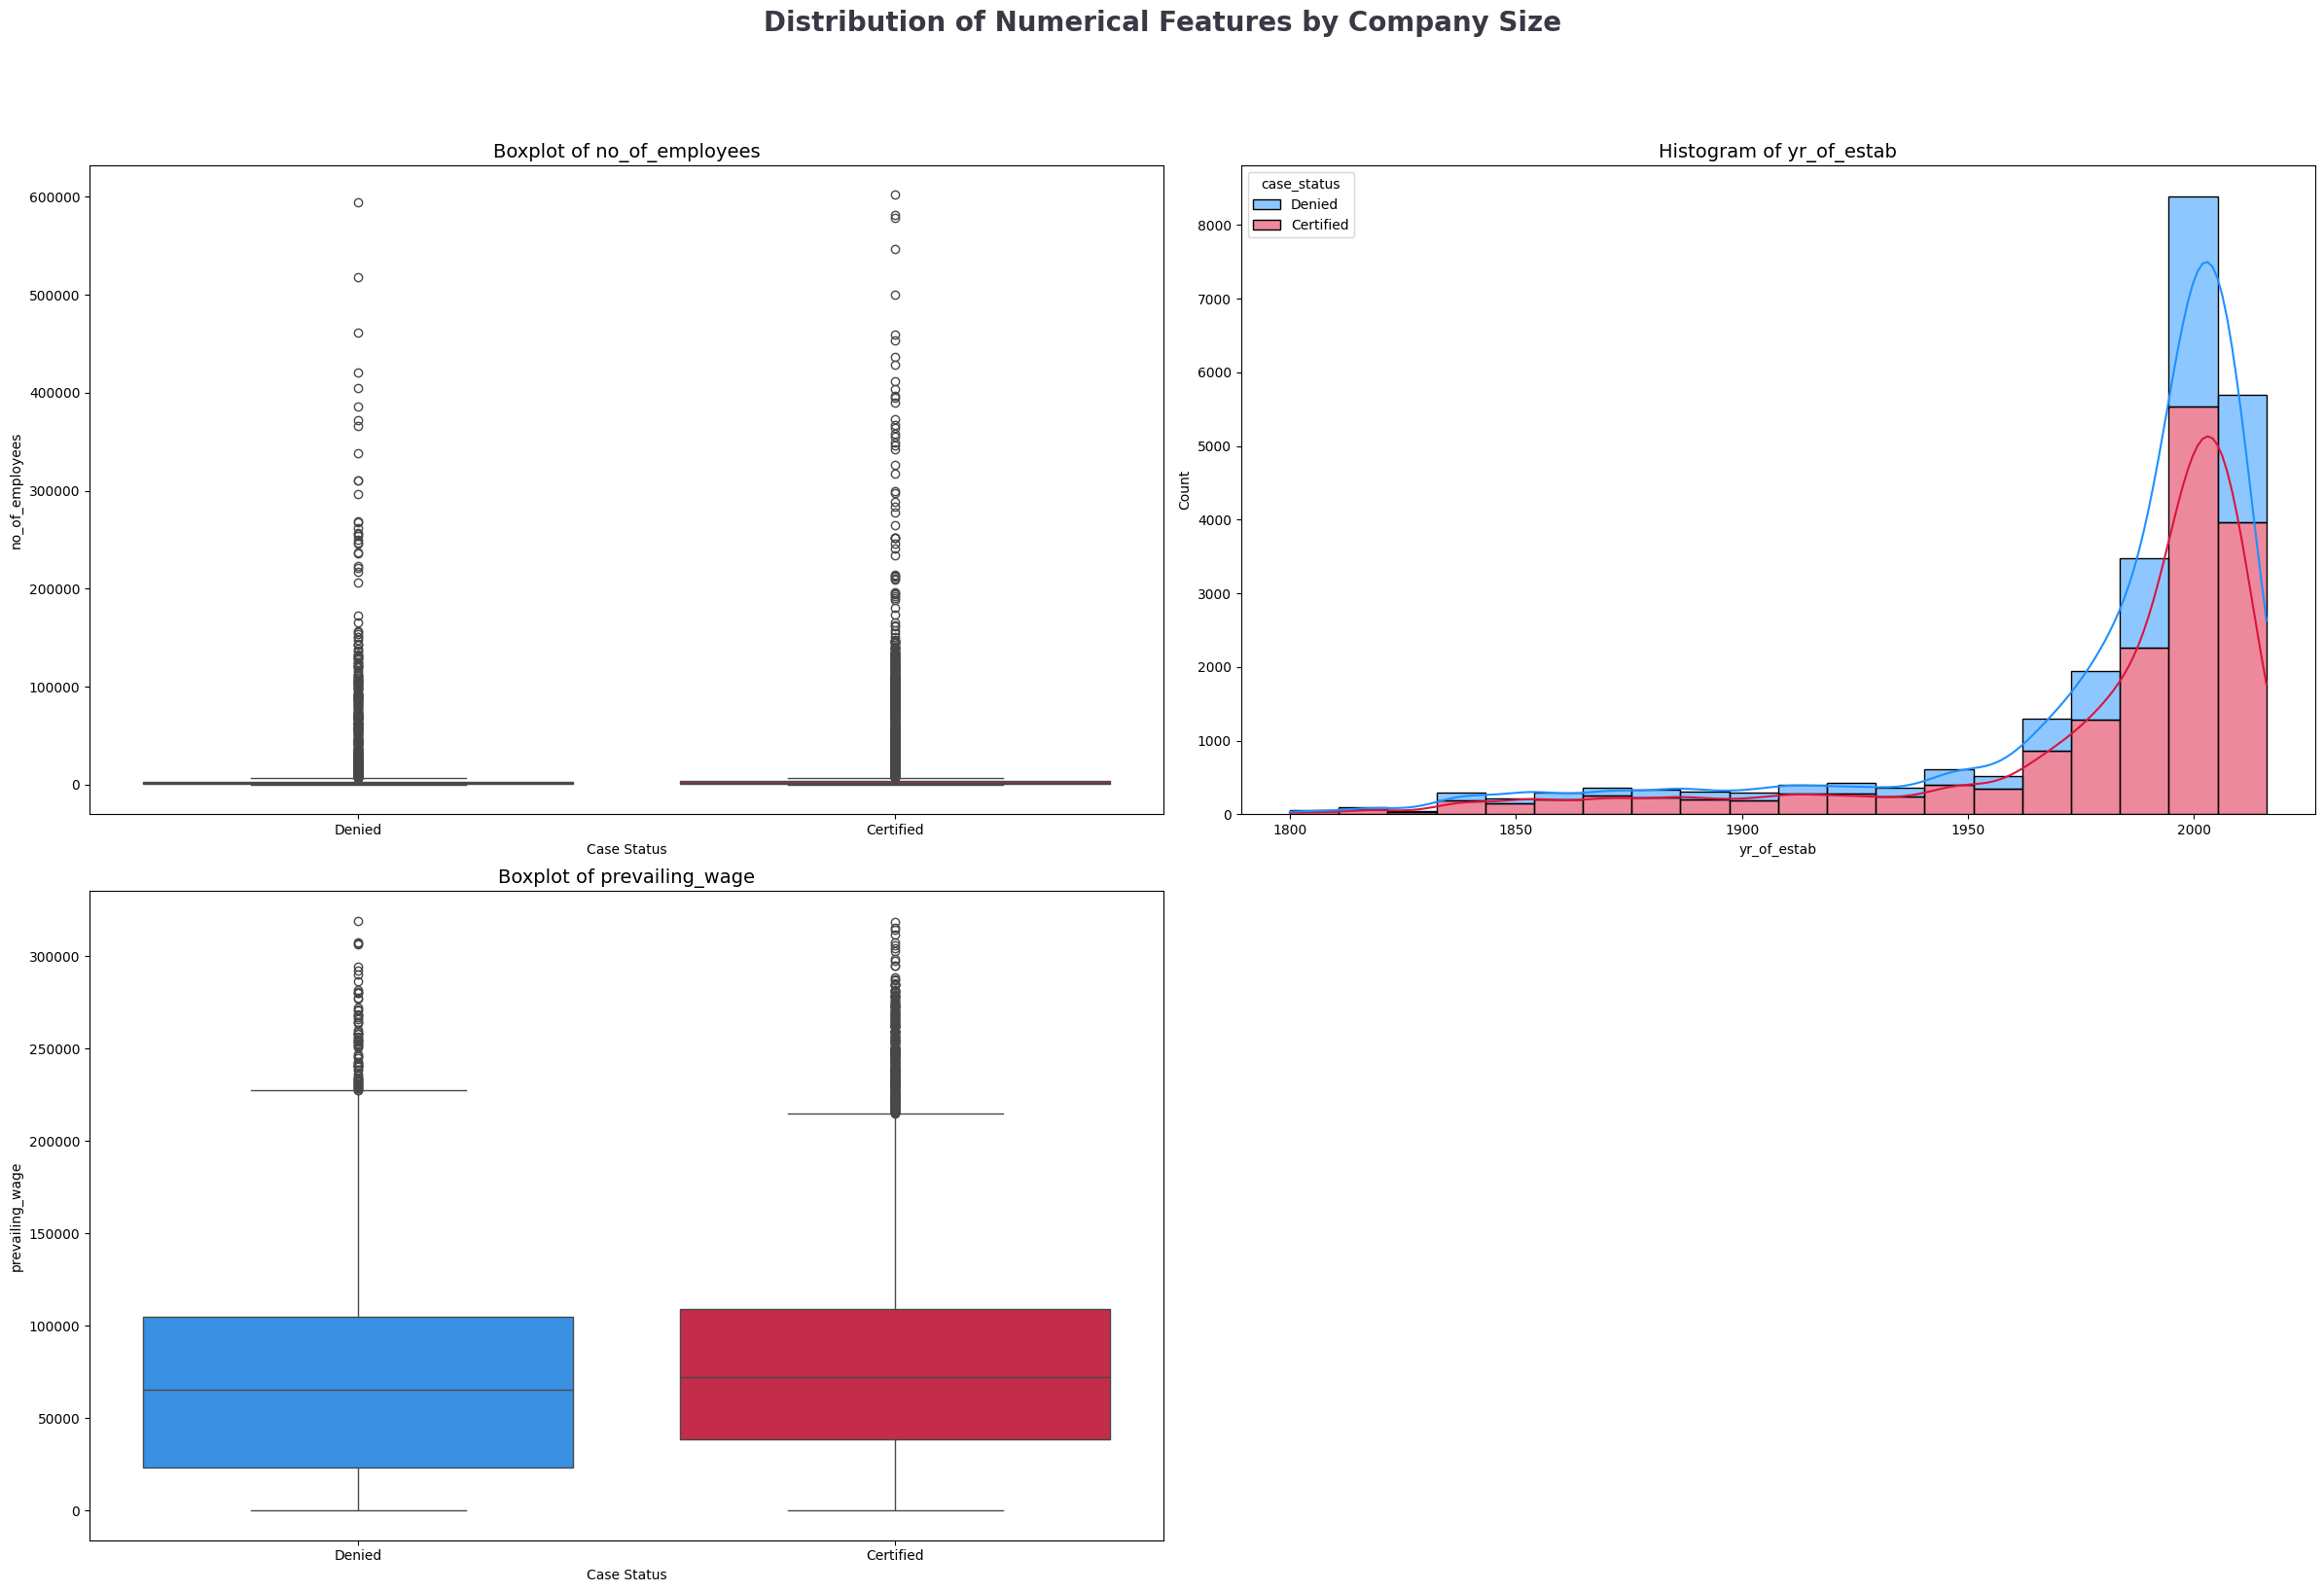

In [26]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

clr1 = ['#1E90FF', '#DC143C']
n = len(continuous_features)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(24, 8 * nrows))
fig.suptitle('Distribution of Numerical Features by Company Size',
             color='#3C3744', fontsize=20, fontweight='bold', y=1.02)

for idx, col in enumerate(continuous_features):
    row = idx // ncols
    col_idx = idx % ncols

    # left column: boxplot
    if col_idx == 0:
        ax = axes[row, 0] if nrows > 1 else axes[0]
        sns.boxplot(
            data=df,
            x='case_status',
            y=col,
            palette=clr1,
            ax=ax
        )
        ax.set_title(f'Boxplot of {col}', fontsize=14)
        ax.set_xlabel('Case Status')
        ax.set_ylabel(col)

    # right column: stacked histogram
    else:
        ax = axes[row, 1] if nrows > 1 else axes[1]
        sns.histplot(
            data=df,
            x=col,
            hue='case_status',
            bins=20,
            kde=True,
            multiple='stack',
            palette=clr1,
            ax=ax
        )
        ax.set_title(f'Histogram of {col}', fontsize=14)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

# If there's an empty subplot (when n is odd), remove it
total_plots = nrows * ncols
if total_plots > n:
    # compute index of last empty axes
    empty_idx = n
    r = empty_idx // ncols
    c = empty_idx % ncols
    fig.delaxes(axes[r, c])

fig.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


__Initial Analysis Report__

* No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
* yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
* prevailing_wage is right skewed with outliers above upper bound of box plot.
* There are No missing values in the dataset.
* The case_id column can be deleted because each row has unique values.
* The case_status column is the target to predict.
* In the Categorical column, features can be made Binary numerical in feature Encoding



### 4 ) Visualization

#### 4.1 - Visualize the Target Feature

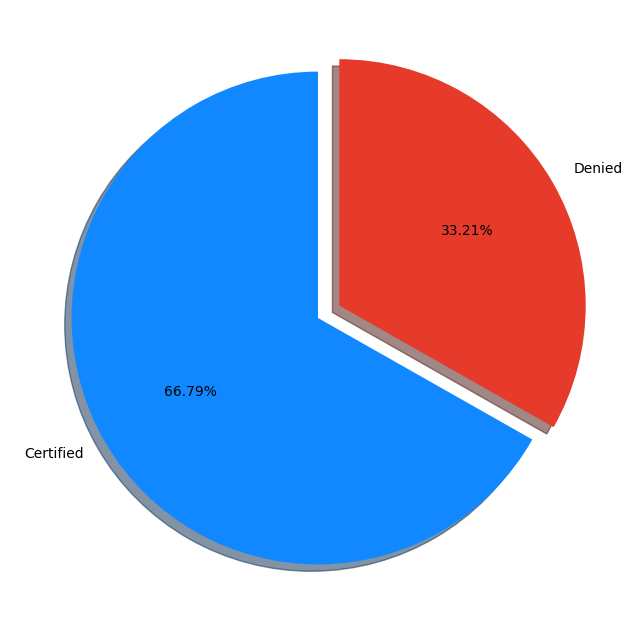

In [27]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

First of all apply the entire process using the videos for the same dataset. And then once the pipeline is set then use your own dataset, follow the pipeline and make your very own project.


* From the chart it is seen that the Target Variable is Imbalanced What is imbalanced data?

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.

### 4.2 - Does applicant Continent has any impact on Visa status ?

In [28]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

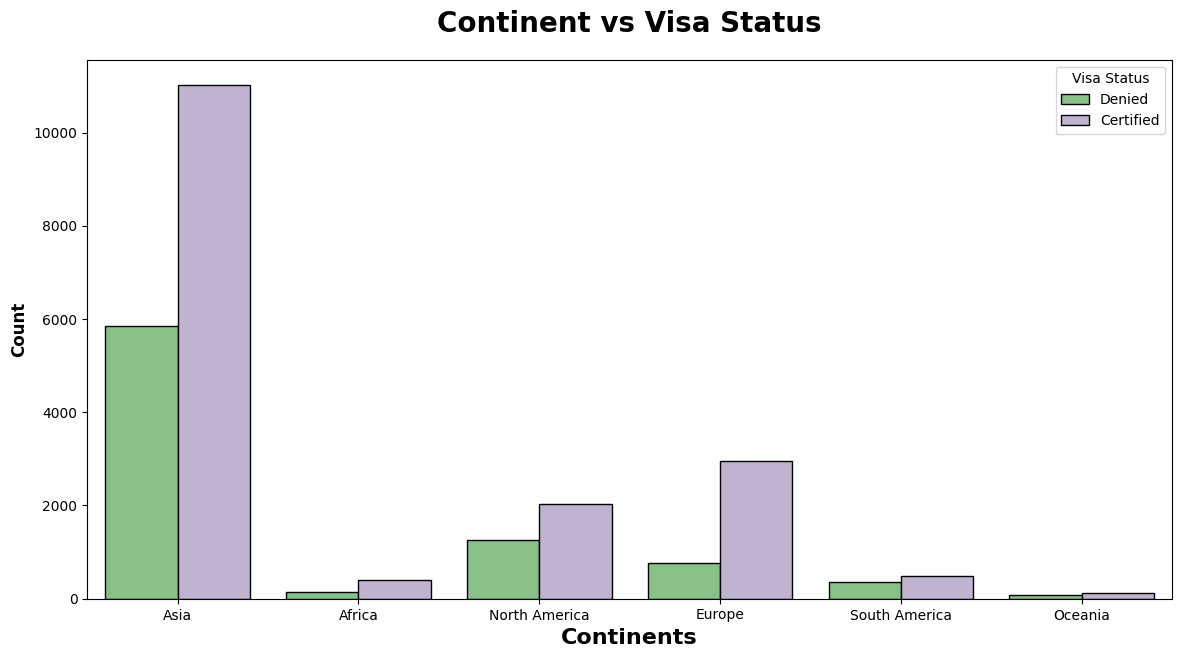

In [29]:
# this block of code is used to visualize the impact of applicant continent on visa status

plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [30]:
df2 = df.copy()

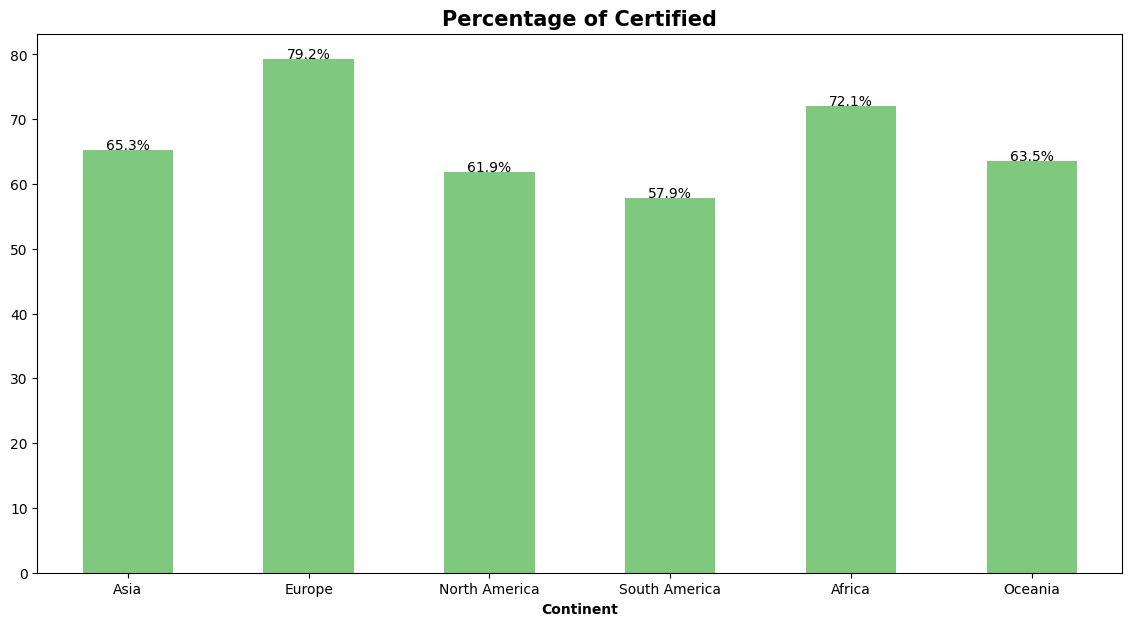

In [32]:
# this block of code is used to visualize the percentage of certified cases by continent

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()



__Report:__

- As per the Chart Asia applicants applied more than other continents.
- 43% of Certified applications are from Asia.
- This is followed by Europe with 11% of Certified applications.
- Highest chance of getting certified if you are from Europe and followed by Africa



### 4.3 - Does applicant education has any impact on Visa status ?

In [33]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

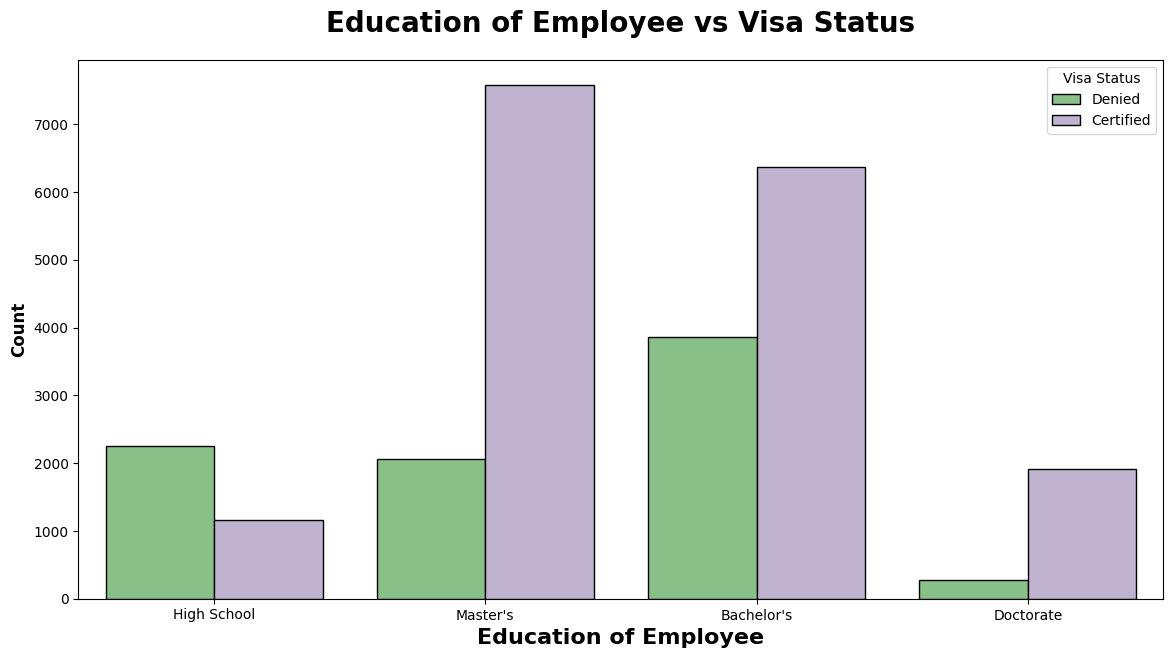

In [35]:
# this block of code is used to visualize the impact of applicant education on visa status

plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

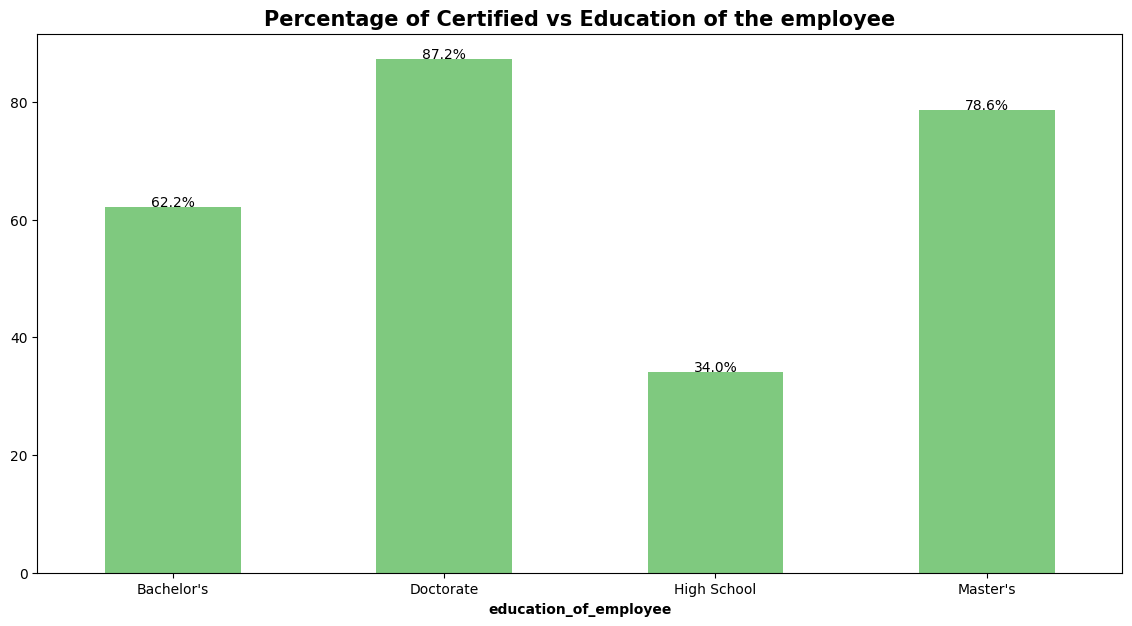

In [36]:
# this block of code is used to visualize the percentage of certified cases by education of employee

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

__insights__

* education status has high impact
* Doctorate and Master's graduates have higher cange of being accepted then the others.


### 4.4 - Does applicant's previous work experience has any impact on Visa status ?

In [37]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

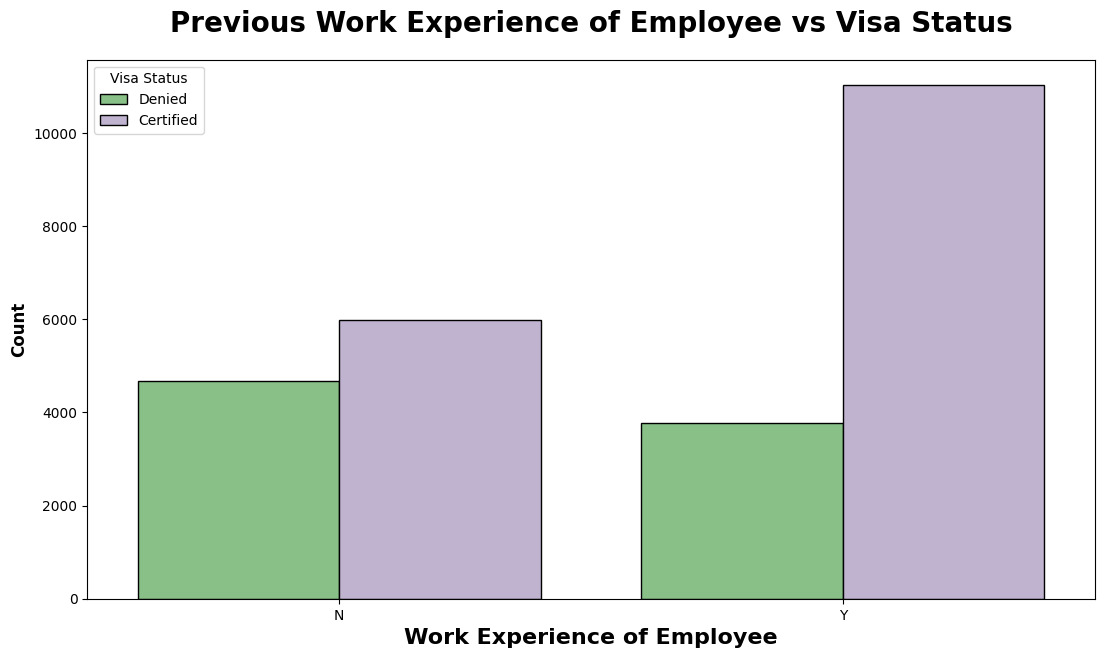

In [38]:
# this block of code is used to visualize the impact of applicant's previous work experience on visa status

plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

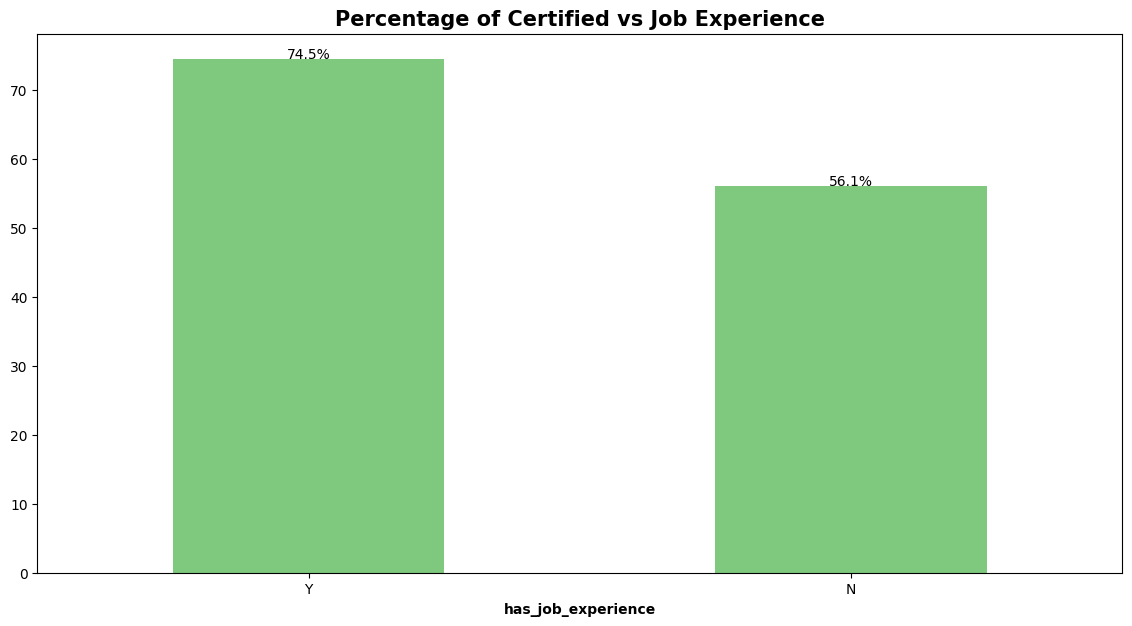

In [40]:
# this block of code is used to visualize the percentage of certified cases by has_job_experience

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

__Report__

* People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
* People with No previous work experience has been certified 56% and denied 43%.
* This means work experience has effect on Visa status.
* There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

### 4.5 - If the Employee requires job training, does it make any impact on visa status?

In [41]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

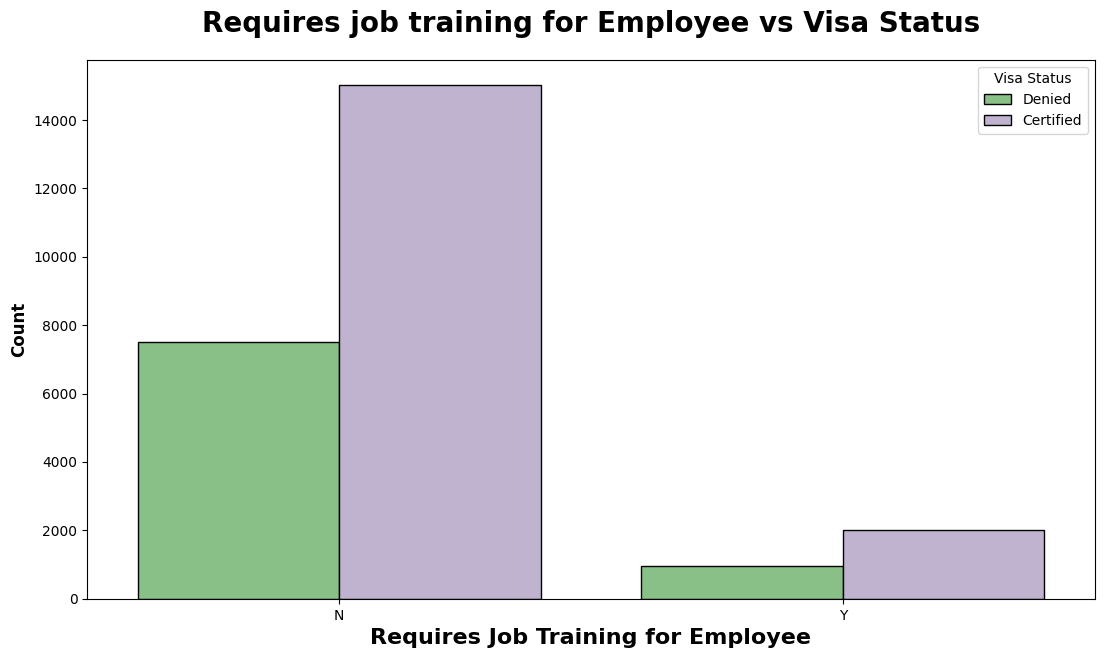

In [42]:
# this block of code is used to visualize the impact of requires_job_training on visa status 

plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

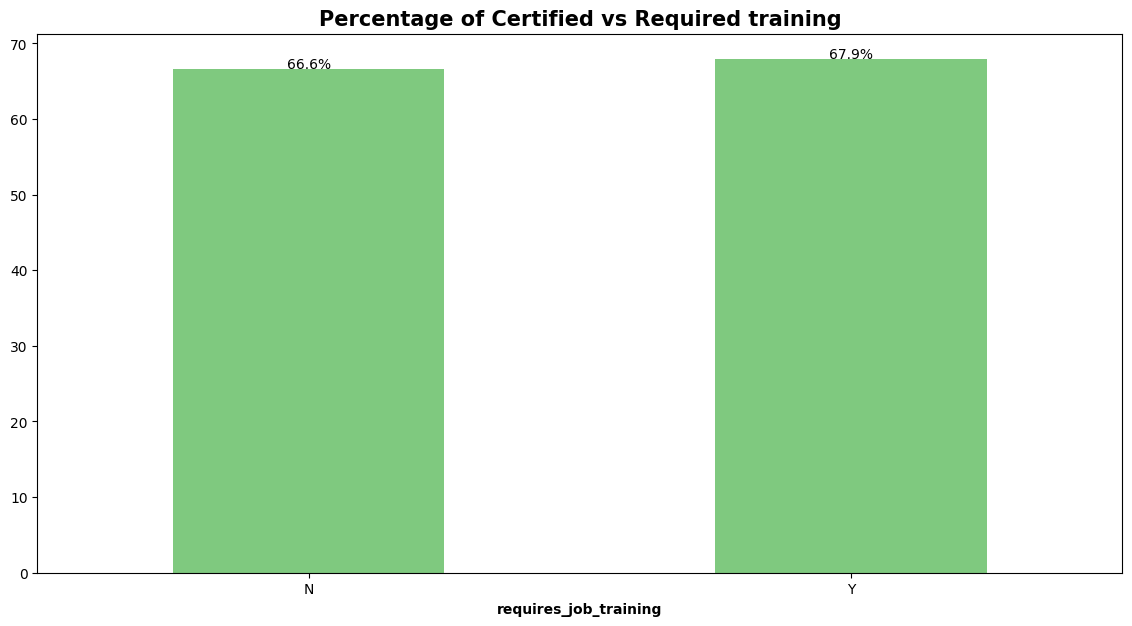

In [43]:
# this block of code is used to visualize the percentage of certified cases by requires_job_training

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


__Report__

* If employee requires job training and it doesn't have any effect on Visa status.
* 88% of applicant don't require job training.
* 63% of people who doesnt want job training got certified.
* For employees who require job training 67% of people get certified.
* As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

### 4.6 - Does Number of employees of employer has any impact on Visa status?

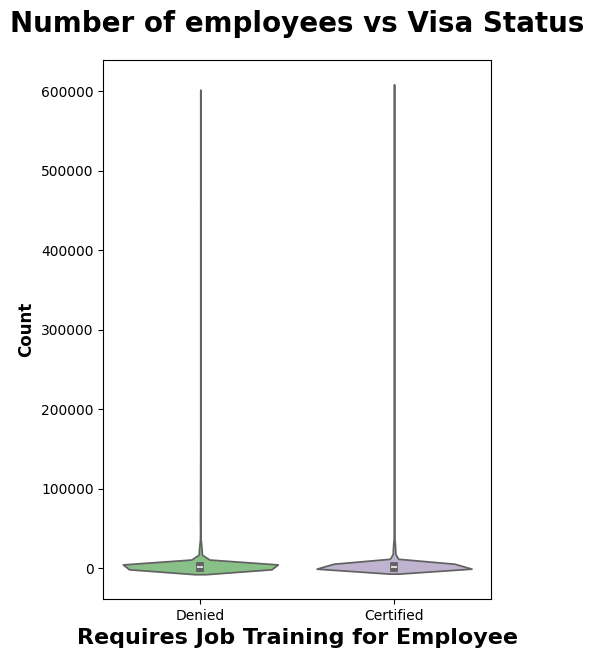

In [45]:
# this block of code is used to visualize the impact of number of employees on visa status

plt.subplots(figsize=(5,7))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

__Insights__

* The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

### 4.7 - Wages and its impact on Visa status

In [46]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

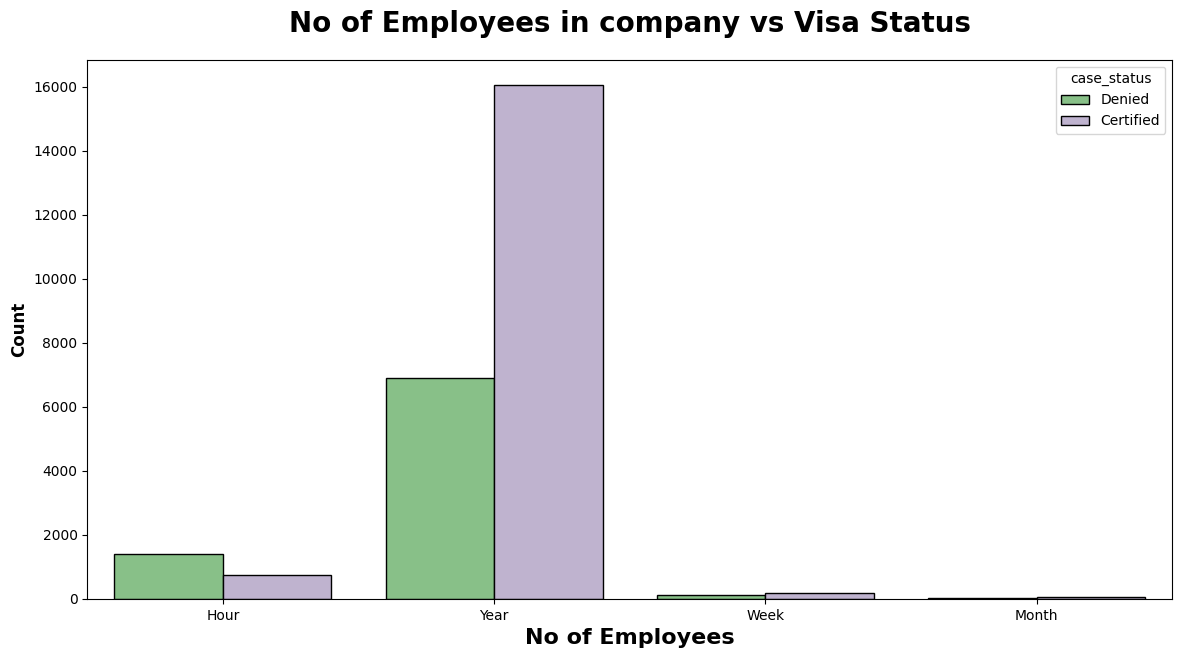

In [47]:
# this block of code is used to visualize the impact of unit_of_wage on visa status 

plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()



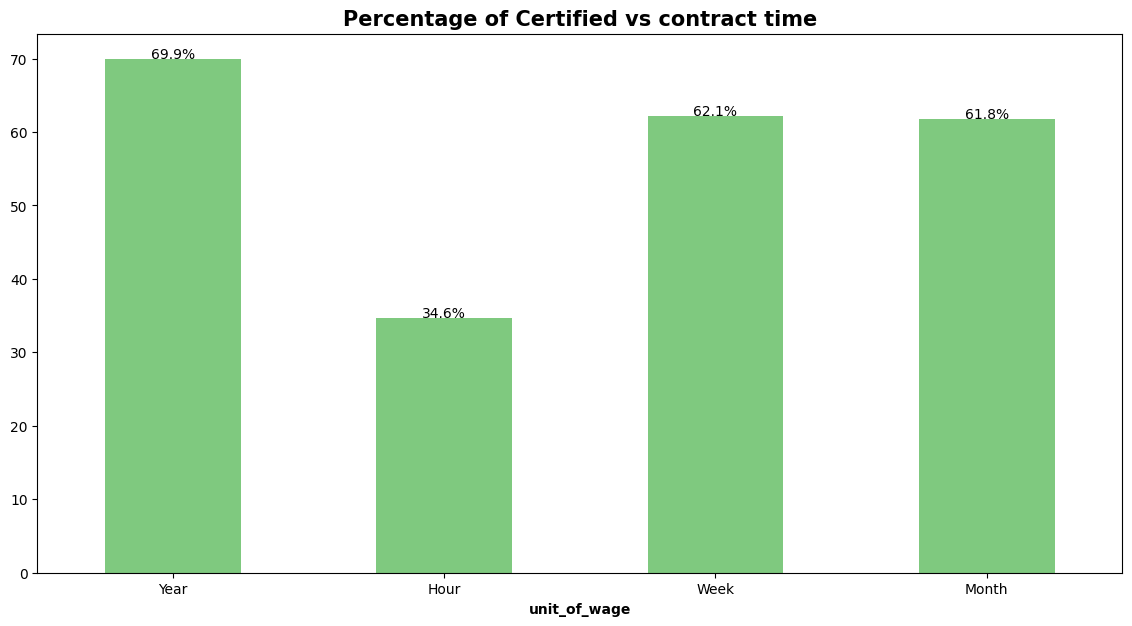

In [49]:
# this block of code is used to visualize the percentage of certified cases by unit_of_wage

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

__Report__

- For employees who applied for hourly pay 65% of them were denied.
- Yearly unit wage application were accepted for 69% and denied for 31% of the time.
- There is a higher chance of yearly contract than other and immediately followed by week and month.

### 4.7 - Does Region of employment has impact on Visa status ?

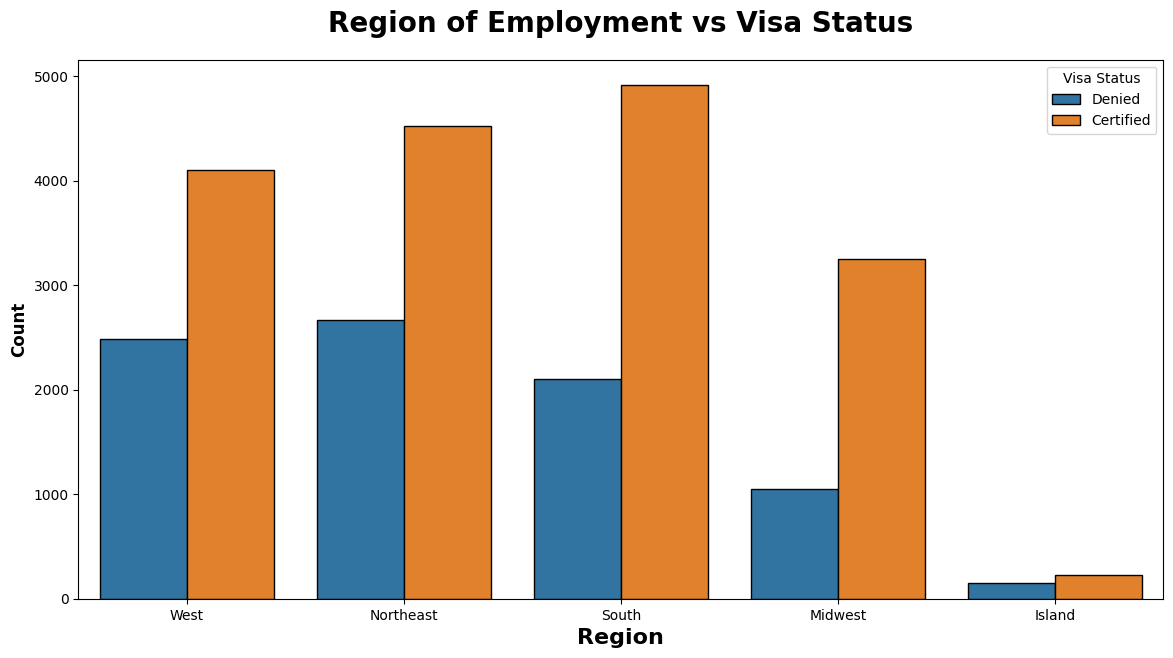

In [50]:
# this block of code is used to visualize the impact of region_of_employment on visa status

plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

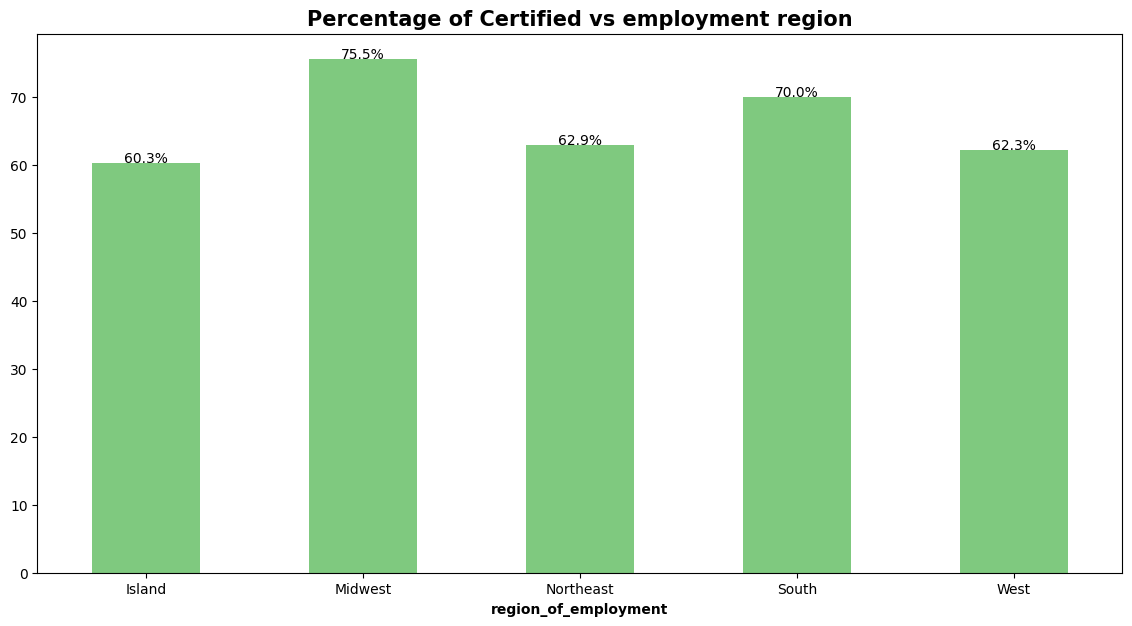

In [51]:
# this block of code is used to visualize the percentage of certified cases by region_of_employment

plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

__Report__

- As per chart all the region have very similar pattern of getting Visa certified and Denied.
- There is a slight edge for midwest followed by South region

### 4.8 - Does Prevailing wage has any impact on Visa status ?

In [52]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

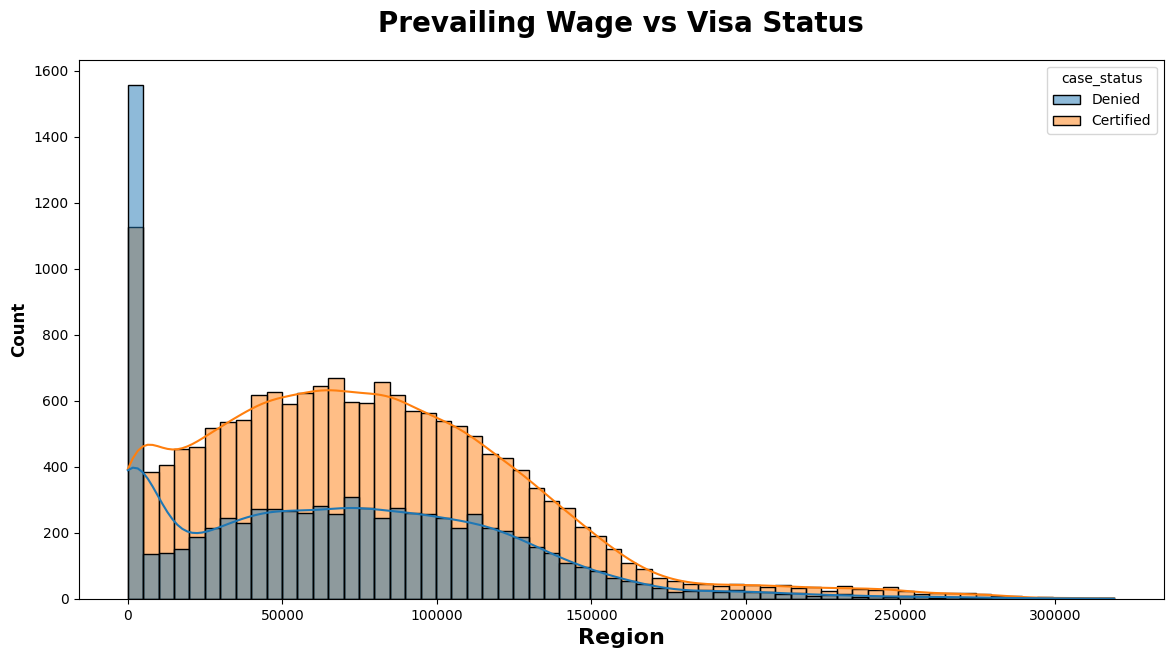

In [54]:
# this block of code is used to visualize the impact of prevailing_wage on visa status

plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing Wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

__Insights__

* The distribution of both the classes are same but need to handel the outliers.

#### 4.8.1 - Prevailing wage based on Education

In [55]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


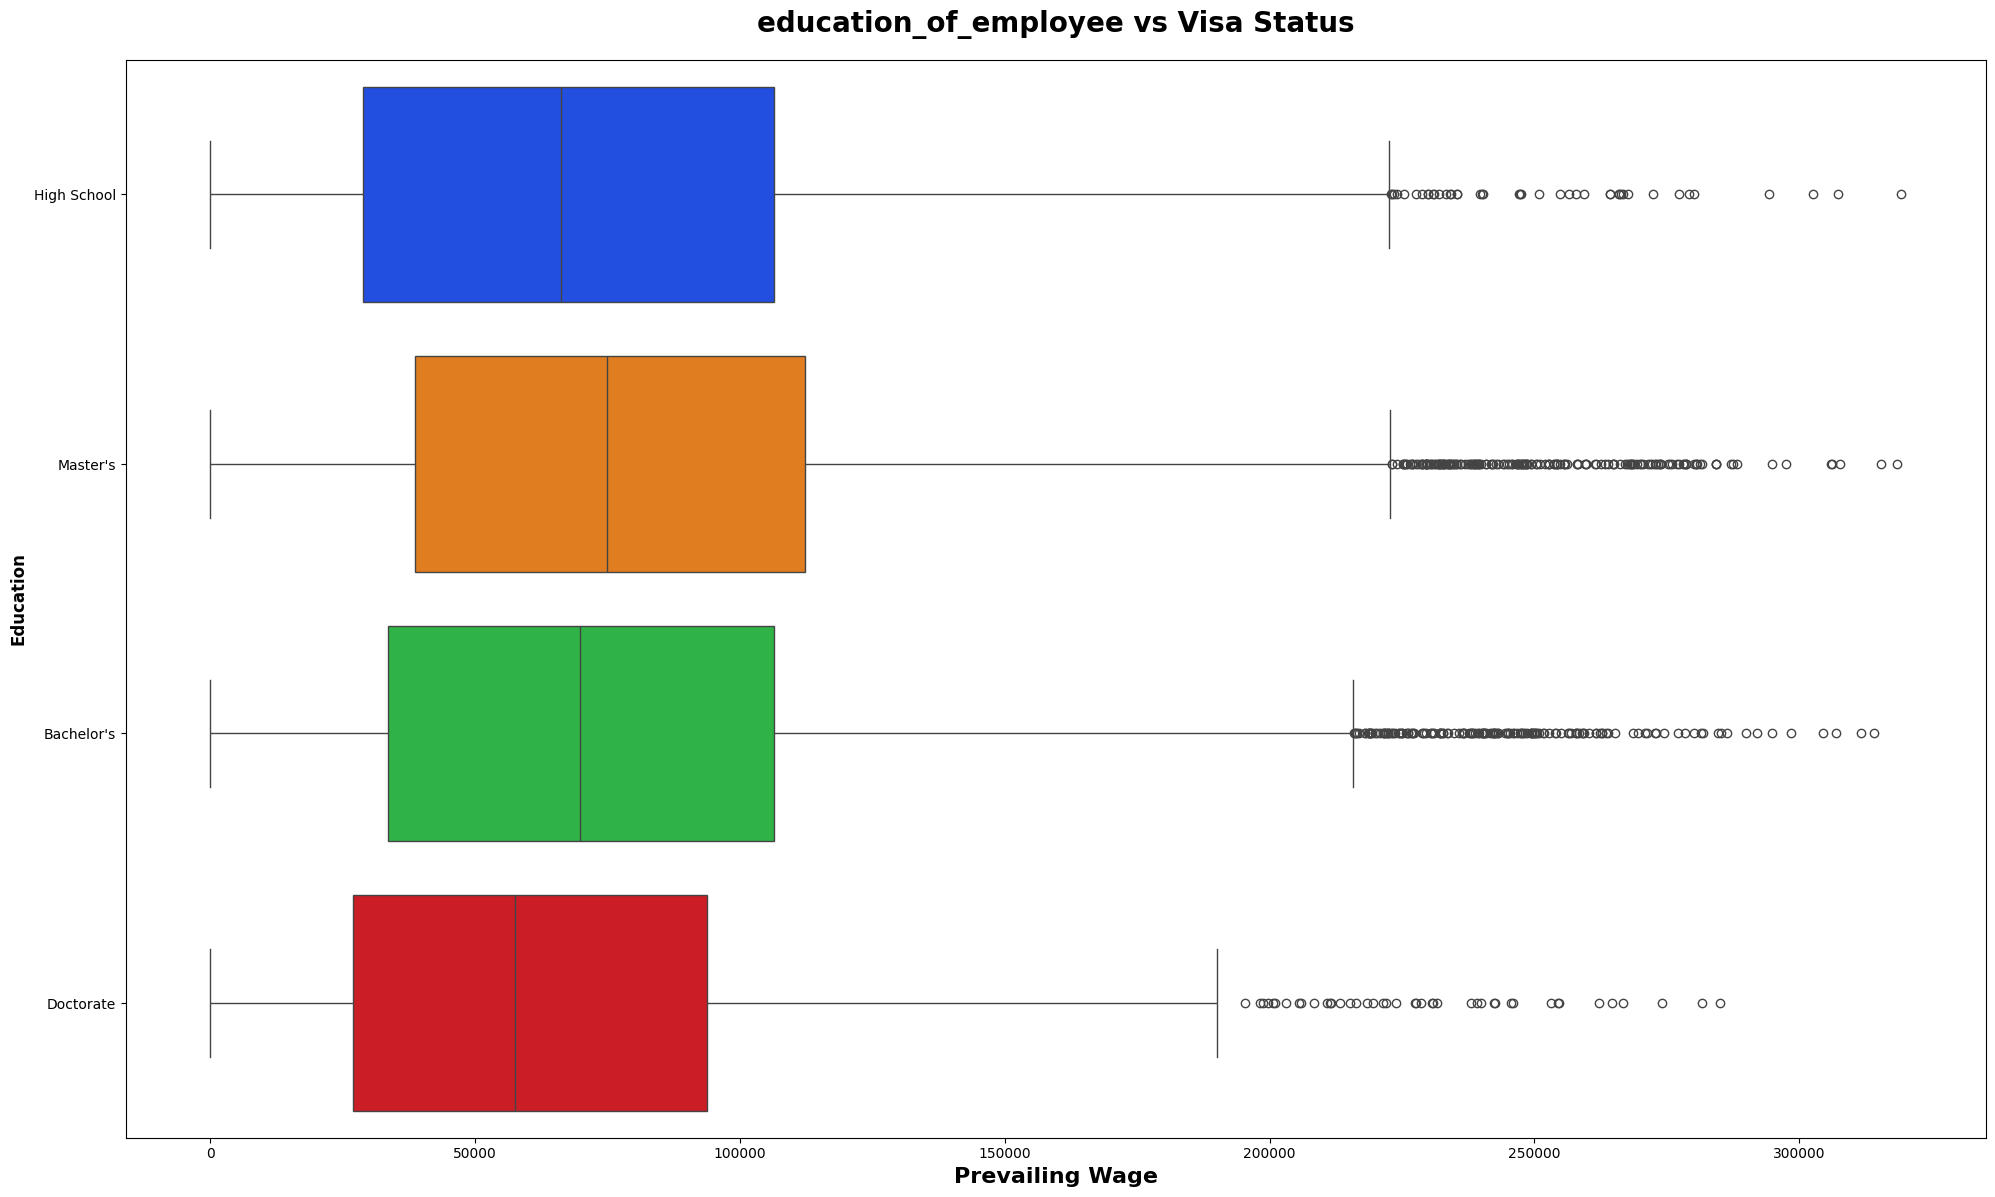

In [57]:
# this block of code is used to visualize the impact of prevailing_wage on education_of_employee

plt.subplots(figsize=(24,14))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

__Report__

* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
* Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

### 4.8.2 - Prevailing wage based on Job experience

In [58]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


__Report__

- Suprisingly people who has less job experience has more prevailing wage.
- No job experience applicant has median prevailing wage as 72k USD.
- Previous job experience applicant has median prevailing wage as 69K USD.

#### 4.8.3 - Prevailing wage based on Continent

In [59]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


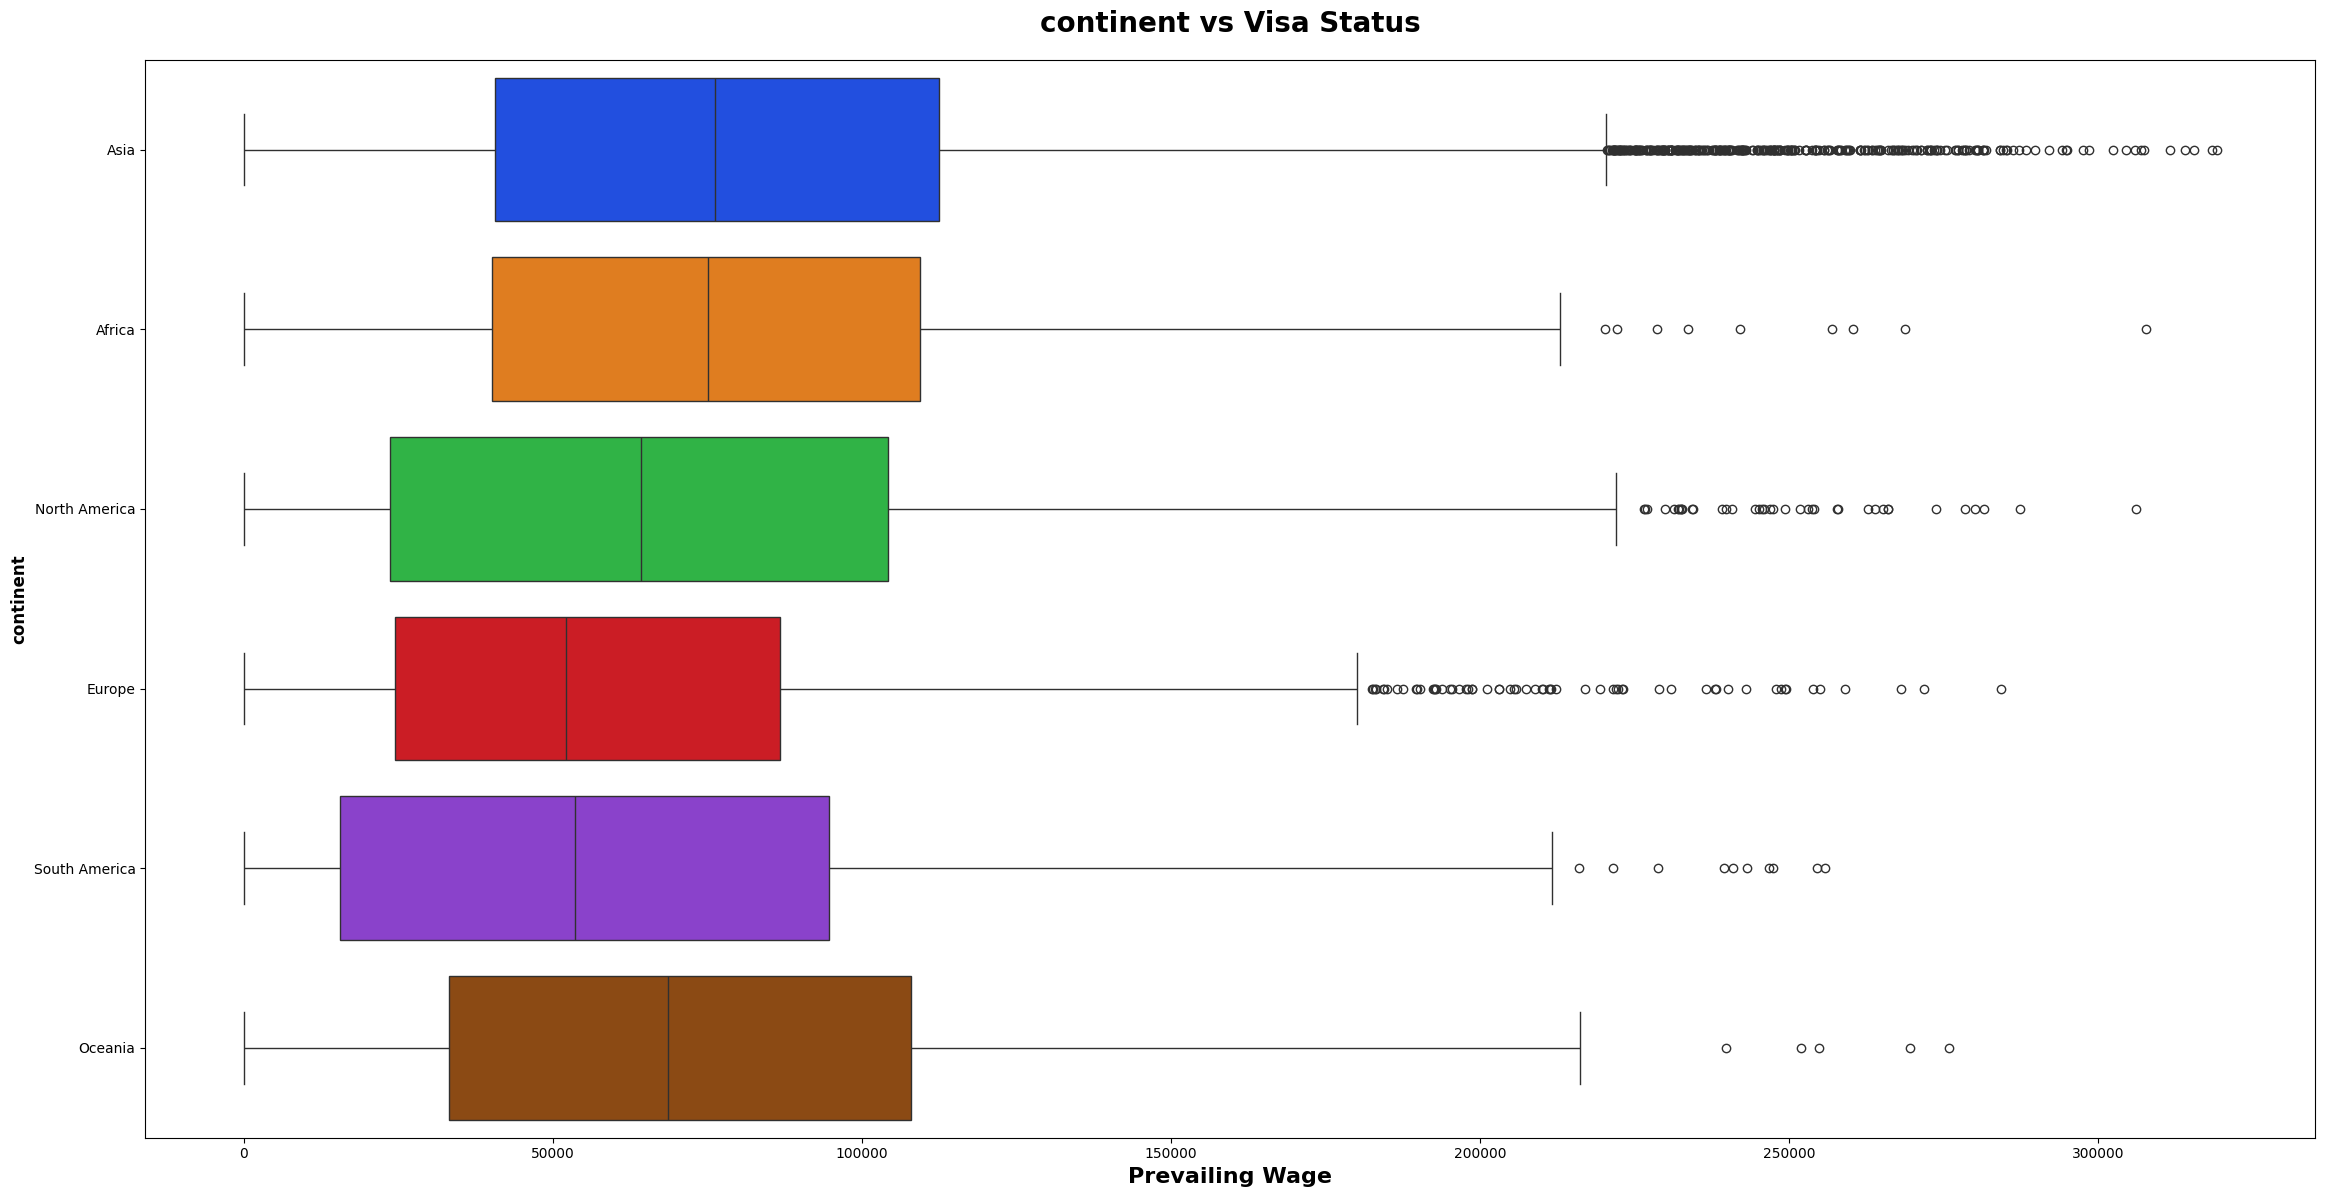

In [61]:
# this block of code is used to visualize the impact of prevailing_wage on continent 

plt.subplots(figsize=(28,14))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

__Report__

- Average salary of people from Asia is higher than other continents.

### 4.9 - Year of Establishment

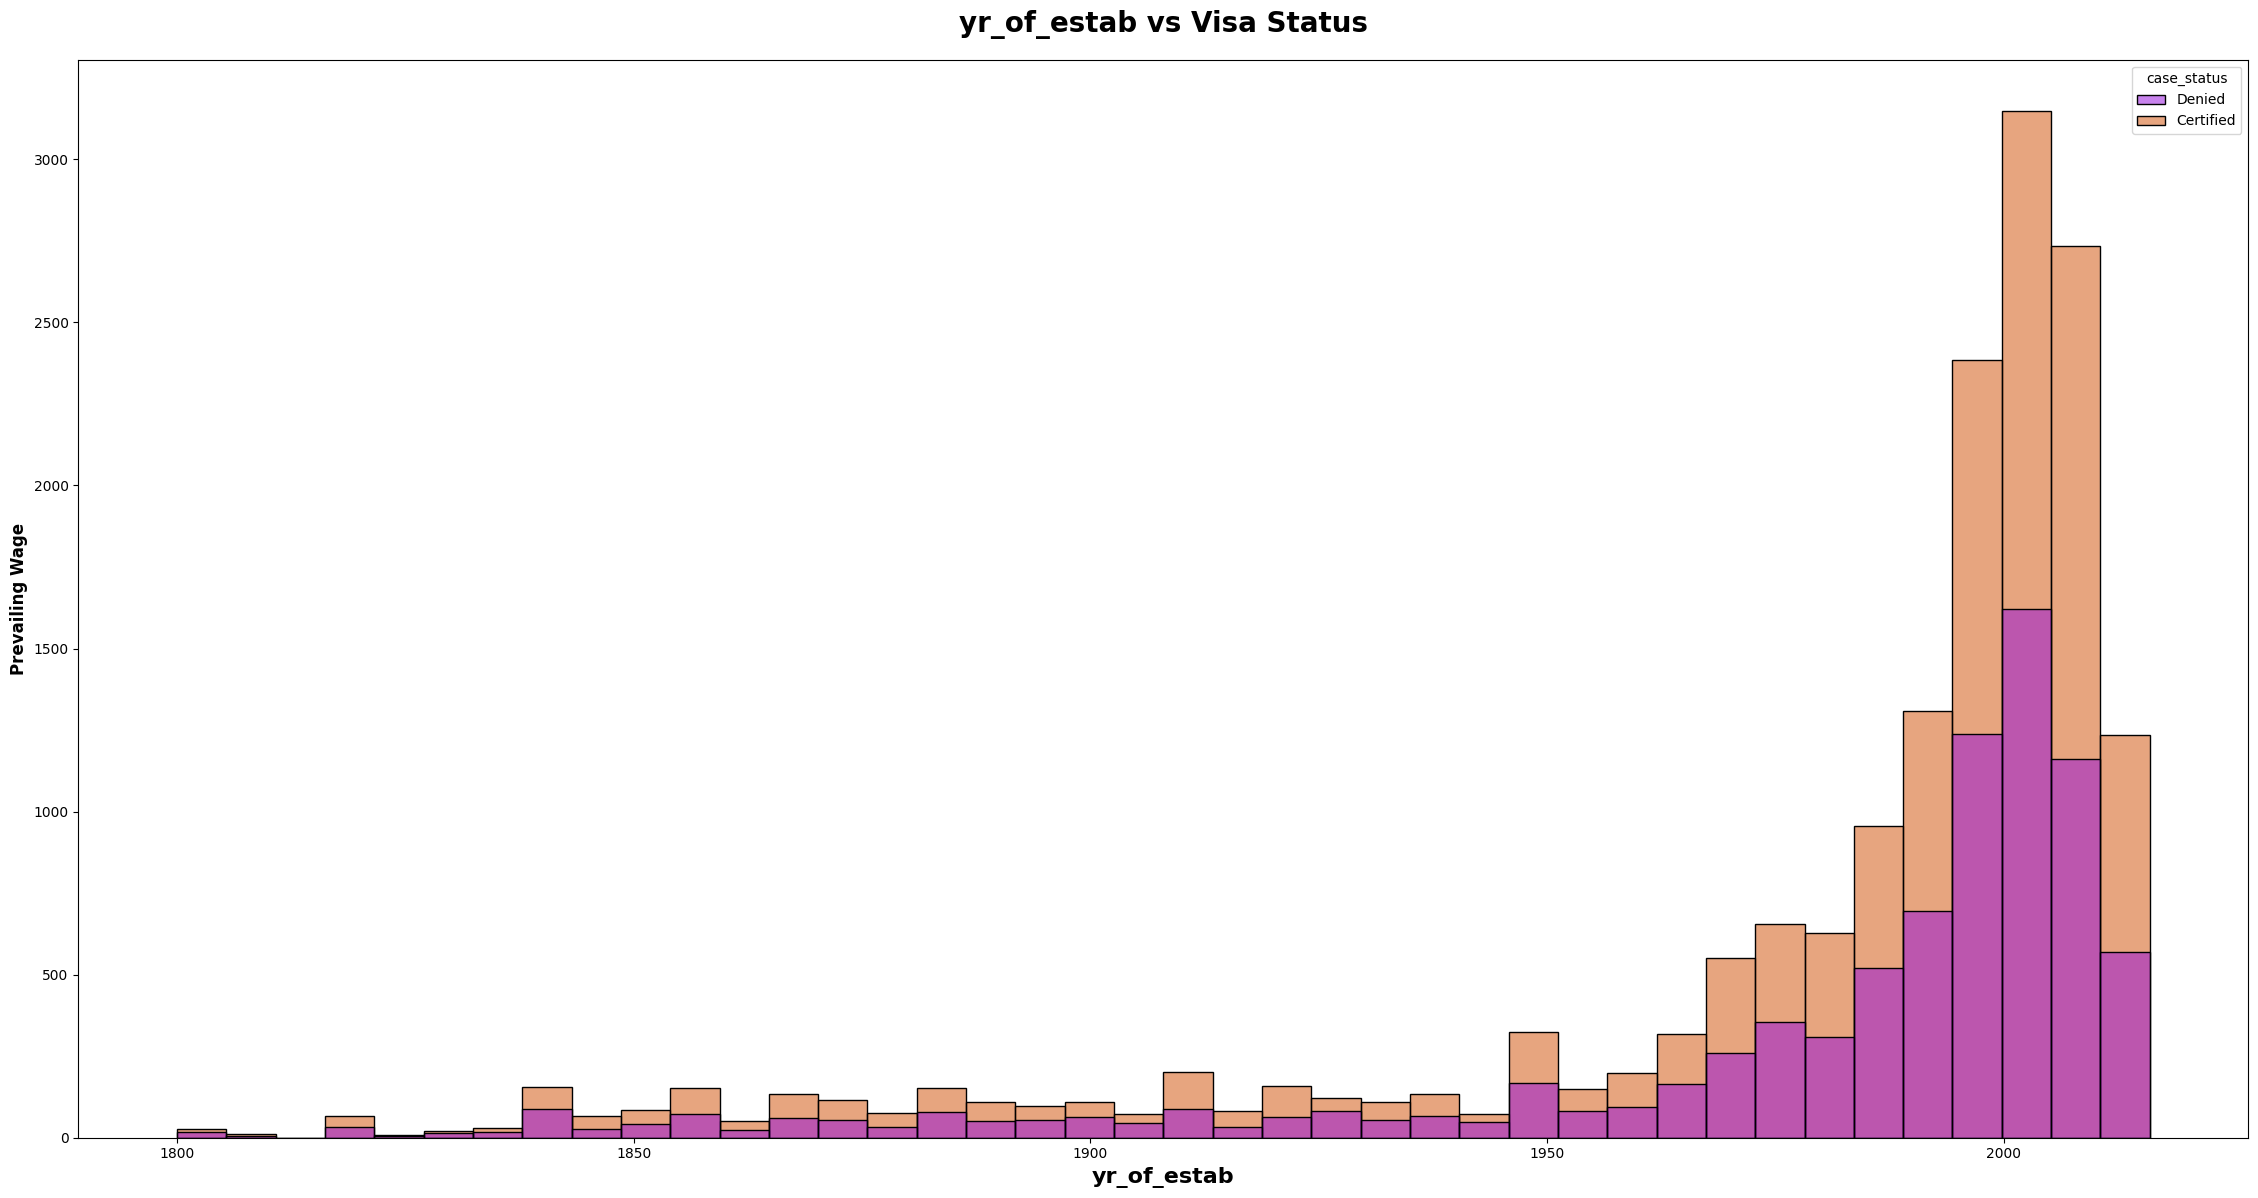

In [63]:
# this block of code is used to visualize the impact of yr_of_estab on visa status

plt.subplots(figsize=(28,14))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

__Report__

- Each bins consists of 5 years.
- Many companies were established after year 2000.
- The most company establishment happened in year 2000-2005.

# Final Report

- case_id column can be dropped as it is an ID.
- requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
- no_of_employees, prevailing_wage columns have outllier which should be handled.
- continent columns has few unique values with very less count, which can be made as others
- Target column case_status is imbalanced can be handled before model building.